In [ ]:
https://github.com/preranaah/Heart-Disease-Classification.git

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.isnull().sum()
#Data is clean

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [8]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


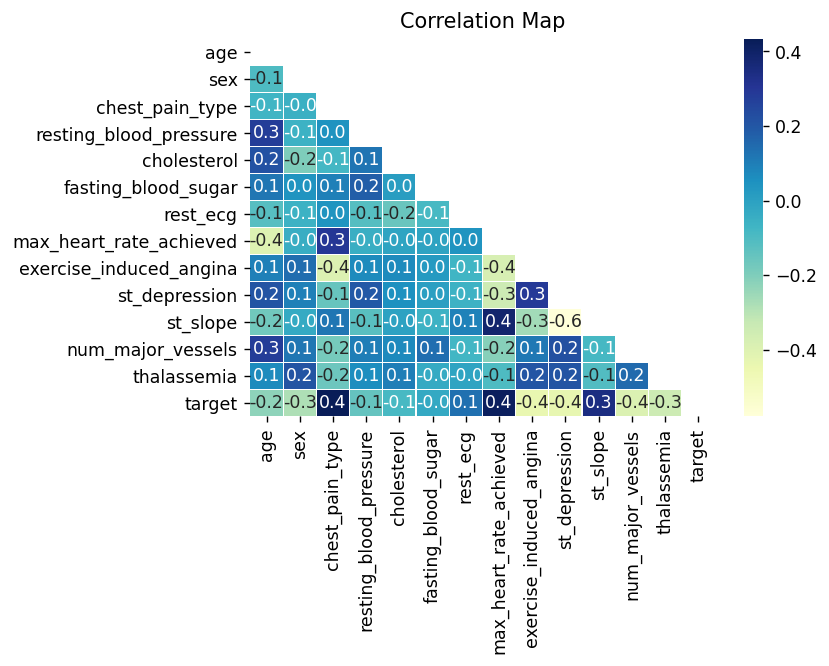

In [9]:
plt.figure(dpi=125,figsize=(6,4))
mask=np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,fmt=".1f",annot= True,lw=.1,cmap='YlGnBu')
plt.title("Correlation Map")
plt.show()

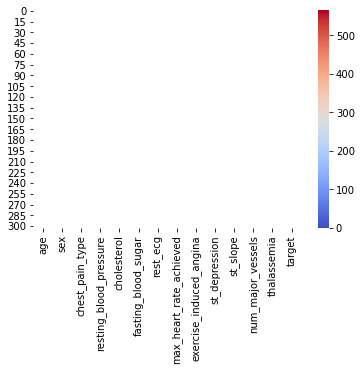

In [10]:
sns.heatmap(df,linewidth=1,cmap='coolwarm')
plt.show()

In [11]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
df[df.columns[:]].corr()['target'][:]

age                       -0.225439
sex                       -0.280937
chest_pain_type            0.433798
resting_blood_pressure    -0.144931
cholesterol               -0.085239
fasting_blood_sugar       -0.028046
rest_ecg                   0.137230
max_heart_rate_achieved    0.421741
exercise_induced_angina   -0.436757
st_depression             -0.430696
st_slope                   0.345877
num_major_vessels         -0.391724
thalassemia               -0.344029
target                     1.000000
Name: target, dtype: float64

    Logistic Regression 



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x_train,x_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=.2,random_state=101)

In [14]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

W:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred=logmodel.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



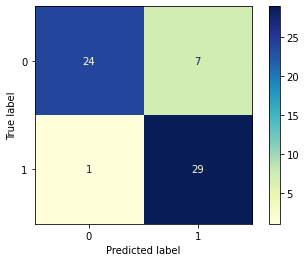

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logmodel,x_test,y_test,cmap='YlGnBu',values_format='.3g')

     Linear Regression 
'''
Multivariables are there which can not fit in linear model
'''

    Decison Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier


In [18]:
x=df.drop('target',axis=1)
y=df['target']

In [19]:
clf_dt = DecisionTreeClassifier(random_state=101)
clf_dt = clf_dt.fit(x_train,y_train)
y_pred = clf_dt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [20]:
clf_dt = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=101)
clf_dt = clf_dt.fit(x_train,y_train)
y_pred = clf_dt.predict(x_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



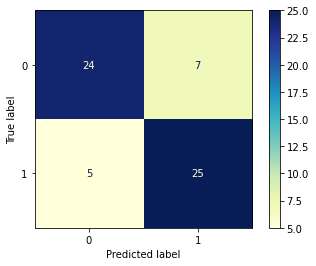

In [21]:
plot_confusion_matrix(clf_dt ,x_test,y_test,cmap='YlGnBu',values_format='.3g')

In [22]:
clf_dt = DecisionTreeClassifier(max_depth=7,random_state=101)
clf_dt = clf_dt.fit(x_train,y_train)
y_pred = clf_dt.predict(x_test)

print(classification_report(y_test, y_pred))                   

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



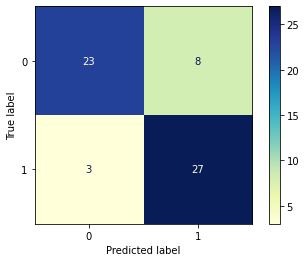

In [23]:
plot_confusion_matrix(clf_dt ,x_test,y_test,cmap='YlGnBu',values_format='.3g')

In [24]:
#This above classifier gave the best 

    Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
clf_rf =RandomForestClassifier(criterion='entropy',max_depth=7,n_estimators=100,min_samples_split=3,random_state=101)
clf_rf.fit(x_train,y_train)
y_pred=clf_rf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



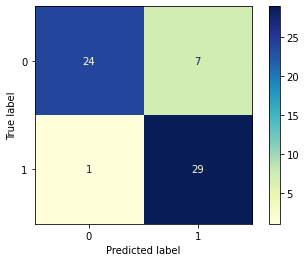

In [27]:
plot_confusion_matrix(clf_rf ,x_test,y_test,cmap='YlGnBu',values_format='.3g')

In [28]:
columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']

<BarContainer object of 13 artists>

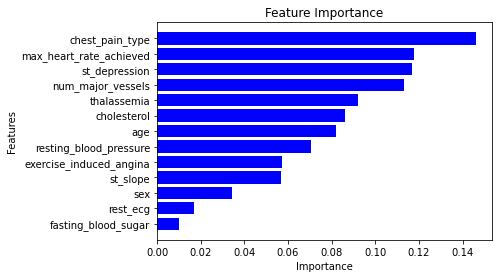

In [29]:
importance = clf_rf.feature_importances_

# summarize feature importance
keys=columns
values=importance 
data=dict(zip(keys,values))
data

data=dict(sorted(data.items(),key=lambda t:t[1],reverse=False))


# plot feature 
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')



plt.barh(list(data.keys()),list(data.values()),color='b')

In [30]:
#SUPPORT VECTOR

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train,y_train)
y_pred = clf_svm.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



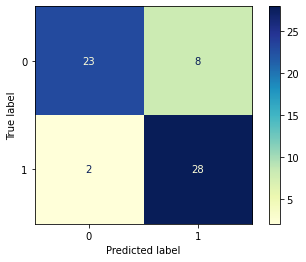

In [33]:
plot_confusion_matrix(clf_svm ,x_test,y_test,cmap='YlGnBu',values_format='.3g')

In [34]:

# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.bar(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = ['input1', 'input2']
# clf_svm = svm.SVC(kernel='linear')
# clf_svm.fit(x_train, y_train)
# f_importances(clf_svm.coef_, features_names)

In [35]:
#PCA


In [36]:
#Standardtise data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
scaler.fit(x_train)

StandardScaler()

In [39]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
#IMPORT AND APPLY PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(n_components=5)
pca.fit(x_train)

PCA(n_components=5)

In [43]:
#HOW MANY COMPONENTS PCA CHOOSE
pca.n_components_

5

In [44]:
pca.explained_variance_ratio_

array([0.20852029, 0.11659021, 0.09426008, 0.09144247, 0.08132119])

In [45]:
x_trainpca =pca.transform(x_train)
x_testpca =pca.transform(x_test)

In [46]:
#Random forest


In [47]:
rf_pca=RandomForestClassifier(criterion='entropy',max_depth=4,n_estimators=100,min_samples_split=3,random_state=101)
rf_pca.fit(x_trainpca,y_train) 
y_pred = rf_pca.predict(x_testpca)

print(classification_report(y_test, y_pred))				



              precision    recall  f1-score   support

           0       1.00      0.65      0.78        31
           1       0.73      1.00      0.85        30

    accuracy                           0.82        61
   macro avg       0.87      0.82      0.81        61
weighted avg       0.87      0.82      0.81        61



Feature: 0, Score: 0.58561
Feature: 1, Score: 0.11197
Feature: 2, Score: 0.08839
Feature: 3, Score: 0.15090
Feature: 4, Score: 0.06312


<BarContainer object of 5 artists>

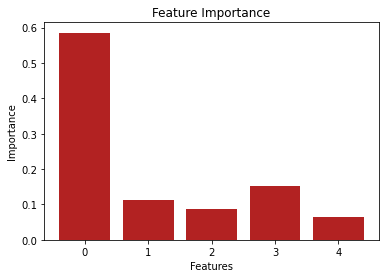

In [48]:
importance = rf_pca.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature 
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')



plt.bar([x for x in range(len(importance))], importance,color='firebrick')

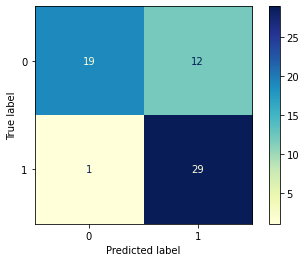

In [49]:
plot_confusion_matrix(clf_svm ,x_test,y_test,cmap='YlGnBu',values_format='.3g')